<a href="https://colab.research.google.com/github/JanakiRamanT17/Data-Scientist-Trainee-Project/blob/main/Project_4_Titanic_Survival_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

**Load Dataset**

In [3]:
df = pd.read_csv("titanic.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  500 non-null    int64  
 1   Pclass    500 non-null    int64  
 2   Sex       500 non-null    object 
 3   Age       450 non-null    float64
 4   Fare      500 non-null    float64
 5   Embarked  480 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 23.6+ KB


# Clean Missing Data

**Check missing values**

In [4]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,50
Fare,0
Embarked,20


**Fill Age with median**

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Fill Embarked with most frequent value**

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Encode Categorical Variables

**Encode Sex**

In [7]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

**Encode Embarked**

In [8]:
df['Embarked'] = le.fit_transform(df['Embarked'])

**Select Features and Target**

In [9]:
X = df[['Sex', 'Age', 'Pclass', 'Fare', 'Embarked']]
y = df['Survived']

**Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Models

**Logistic Regression**

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

**Decision Tree**

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

**Random Forest**

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate Models

**Create evaluation function:**

In [14]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))

**Run evaluation:**

In [15]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression
Accuracy: 0.63
Precision: 0.7142857142857143
Recall: 0.23255813953488372
ROC-AUC: 0.5811913504691962

Decision Tree
Accuracy: 0.51
Precision: 0.42105263157894735
Recall: 0.37209302325581395
ROC-AUC: 0.4930640554875561

Random Forest
Accuracy: 0.55
Precision: 0.4722222222222222
Recall: 0.3953488372093023
ROC-AUC: 0.5310077519379846


**Feature Importance (Random Forest)**

In [16]:
importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(importance_df)

    Feature  Importance
3      Fare    0.450636
1       Age    0.390066
2    Pclass    0.067697
4  Embarked    0.056871
0       Sex    0.034731


**Visualize Feature Importance**

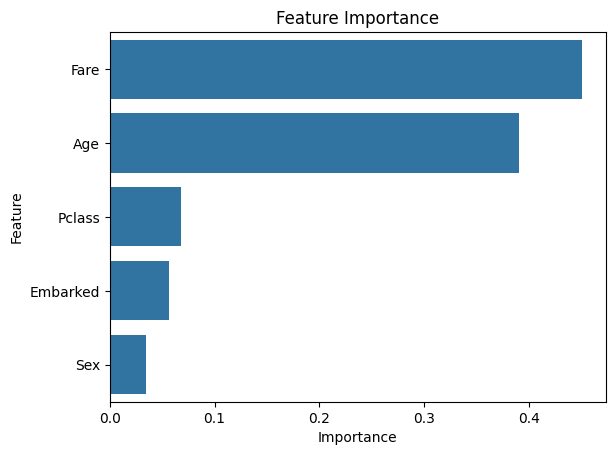

In [17]:
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()